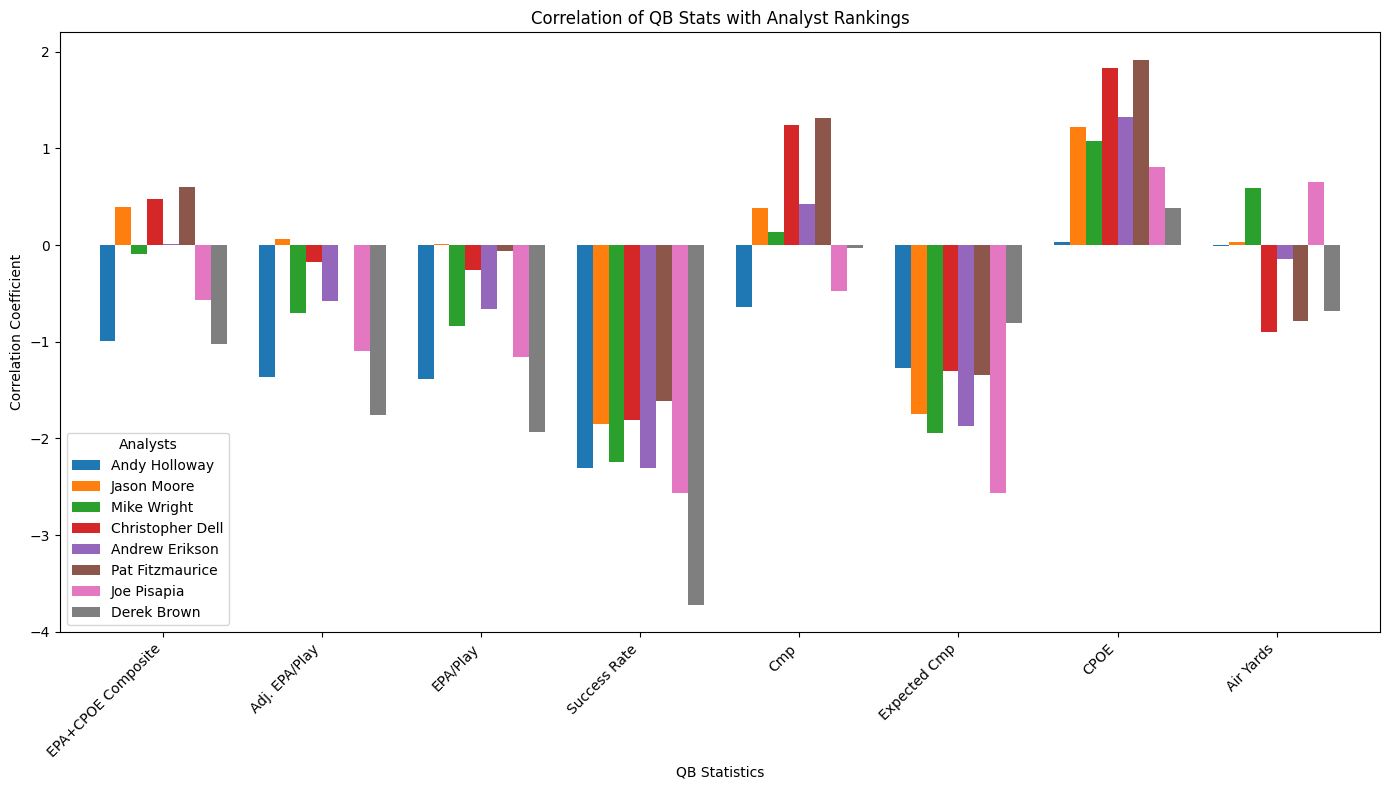

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Read the data from a CSV file
df = pd.read_csv('2024FFBallers_QBs.csv')

# Drop rows where there are missing values to ensure a clean correlation analysis
df_cleaned = df.dropna()

# Extract the rankers' columns and the stats columns
rankers = df_cleaned[['Andy Holloway', 'Jason Moore', 'Mike Wright', 'Christopher Dell','Andrew Erikson','Pat Fitzmaurice','Joe Pisapia','Derek Brown']]
stats = df_cleaned.drop(columns=['Name','Andy Holloway', 'Jason Moore', 'Mike Wright', 'Christopher Dell','Andrew Erikson','Pat Fitzmaurice','Joe Pisapia','Derek Brown'])

# Standardize the statistics to ensure comparability
scaler = StandardScaler()
stats_scaled = scaler.fit_transform(stats)

# Measure the correlation using linear regression (similar to Pearson correlation)
def calculate_correlations(rankers, stats_scaled):
    correlations = {}
    for ranker in rankers.columns:
        correlations[ranker] = {}
        for i, stat in enumerate(stats.columns):
            model = LinearRegression()
            model.fit(stats_scaled[:, i].reshape(-1, 1), rankers[ranker])
            correlations[ranker][stat] = model.coef_[0]
    return correlations

correlations = calculate_correlations(rankers, stats_scaled)

# Convert the correlations to a DataFrame for better readability
correlation_df = pd.DataFrame(correlations)

# Plotting the correlations
correlation_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Correlation of QB Stats with Analyst Rankings')
plt.ylabel('Correlation Coefficient')
plt.xlabel('QB Statistics')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Analysts')
plt.tight_layout()

# Show the plot
plt.show()
